In [1]:
from Game import *

Version:  0.2.45


In [2]:
from tqdm import tqdm

In [3]:
def initial_state():
    return Board(3,3)

In [4]:
def valid_moves(board,player):

    empty=[]
    for i in range(9):
        if board[i]==0:
            empty.append(i)

    return empty

In [5]:
def check_three_in_a_row(row):

    if row[0]==1 and row[1]==1 and row[2]==1:
        return 1
    elif row[0]==2 and row[1]==2 and row[2]==2:
        return 2
    else:
        return 0

In [6]:
def win_status(board,player):
    # in ttt, after a move, that player can either win or stalemate
    # they can't lose after their own move
    
    if check_three_in_a_row( [board[0],board[1],board[2] ])==player:
        return 'win'

    if check_three_in_a_row( [board[2],board[5],board[8] ])==player:
        return 'win'

    if check_three_in_a_row( [board[3],board[4],board[5] ])==player:
        return 'win'

    if check_three_in_a_row( [board[6],board[7],board[8] ])==player:
        return 'win'

    if check_three_in_a_row( [board[0],board[3],board[6] ])==player:
        return 'win'

    if check_three_in_a_row( [board[1],board[4],board[7] ])==player:
        return 'win'

    if check_three_in_a_row( [board[0],board[4],board[8] ])==player:
        return 'win'

    if check_three_in_a_row( [board[6],board[4],board[2] ])==player:
        return 'win'


    # stalemate
    tie=True
    for i in range(9):
        if board[i]==0:
            tie=False

    if tie:
        return 'stalemate'



    return None


In [7]:
def update_state(board,player,move):
    board[move]=player
    return board


In [8]:
def print_row(row):

    line=''
    if row[0]==0:
        line=line+'   '
    elif row[0]==1:
        line=line+' X '
    else:
        line=line+' O '

    line=line+'|'

    if row[1]==0:
        line=line+'   '
    elif row[1]==1:
        line=line+' X '
    else:
        line=line+' O '

    line=line+'|'

    if row[2]==0:
        line=line+'   '
    elif row[2]==1:
        line=line+' X '
    else:
        line=line+' O '

    line=line+'|'
    print(line)


In [9]:
def show_state(board):

    print_row( [ board[0],board[1],board[2] ])
    print("---+---+---")
    print_row( [ board[3],board[4],board[5] ])
    print("---+---+---")
    print_row( [ board[6],board[7],board[8]])
    
    print()
    print("Choices:")
    print("""
     0 | 1 | 2
    ---+---+---
     3 | 4 | 5
    ---+---+---
     6 | 7 | 8
    """)


In [10]:
def random_move(state,player):

    moves=valid_moves(state,player)
    return random.choice(moves)

def human_move(state,player):
    print("Player ", player, end=' ')
    valid_move=False
    while not valid_move:
        move=eval(input('What is your move? '))

        if move in valid_moves(state,player):
            valid_move=True
        else:
            print("Illegal move.")

    return move
 

In [11]:


random_agent=Agent(random_move)
human_agent=Agent(human_move)


In [12]:
from Game.mcts import *
def mcts_move(state,player,info):
    T=info.T
    values,moves=mcts_values(state,player,T,info.seconds)
    return top_choice(moves,values)

mcts_agent=Agent(mcts_move)
mcts_agent.T=Table()
mcts_agent.seconds=1

In [13]:
g=Game(number_of_games=1)
g.display=False
wins=g.run(mcts_agent,random_agent)
g.report()

Total number of games:  1
Winning 100.00 percent
Losing 0.00 percent
Tie 0.00 percent


In [14]:
g.save_states

False

In [15]:
len(g.games)

0

In [16]:
state=initial_state()
T=Table()
mcts_run_simulation(state,player=1,T=T,save_states=True)

(( 0  0  0 
   0  0  0 
   0  0  0 ,
   1  2  0 
   0  0  0 
   0  0  0 ,
   1  2  0 
   1  2  0 
   0  0  0 ,
   1  2  1 
   1  2  0 
   2  0  0 ),
 (0, 3, 2, 8),
 -1)

In [17]:
import numpy as np
from nn import NumpyNetTable

Version  1.0.7
nn 0 0 2


In [18]:
def all_possible_moves():
    all_moves=[]
    for move in range(9):
        all_moves.append(move)
            
    return all_moves

def state_to_X(state):  
    import numpy as np
    N2=len(state)
    arr=np.zeros((1,N2))  # number of samples, size
    for i in range(N2):
        if state[i]==0:
            arr[0,i]=0
        elif state[i]==1:
            arr[0,i]=1
        elif state[i]==2:
            arr[0,i]=-1
                     
    return arr

In [19]:
from datetime import datetime

In [20]:
def QNN_move(state,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state

    learning=info.learning
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move
    number_of_games_mcts=info.number_of_games_mcts  # for the MCTS
    T=info.T  # mcts table
    if T is None:  #if the table is None, then reset it each move for memory
        T=Table()
    
    new_state=state
    new_actual_moves=valid_moves(new_state,player)    
    new_action_values=Q[new_state]
    new_values=[new_action_values[move] for move in new_actual_moves] 
    
    if learning and random.random()<epsilon:  # random move
        action=random.choice(new_actual_moves)
    else:
        action=top_choice(new_actual_moves,weights=new_values)

            
#         # Ask the model for the Q values of the old state (inference)
#         old_state_Q_values = self.get_Q(old_state)

#         # Ask the model for the Q values of the new state (inference)
#         new_state_Q_values = self.get_Q(new_state)

#         # Real Q value for the action we took. This is what we will train towards.
#         old_state_Q_values[action] = reward + self.discount * np.amax(new_state_Q_values)
        
    if not learning or alpha==0:  # no learning
        return action

    # we won't learn from the current game, we'll play out a number of MCTS games
    calculation_time=1 # maximum seconds of mcts
    games=0
    begin=datetime.utcnow()
    while ( (datetime.utcnow()-begin).total_seconds()< calculation_time) and (games<number_of_games_mcts):
        states,moves,game_reward=mcts_run_simulation(state,player,max_moves=30,T=T,save_states=True)

        possible_moves=Q.all_moves
        for k in range(len(states)-1):
            state1=states[k]
            move1=moves[k]
            state2=states[k+1]

            actual_moves1=valid_moves(state1,player)
            action_values1=Q[state1]
            values1=[action_values1[move] for move in actual_moves1] 

            actual_moves2=valid_moves(state2,player)
            action_values2=Q[state2]
            values2=[action_values2[move] for move in actual_moves2] 

            target=[]
            for i,move in enumerate(possible_moves):
                if move==move1:
                    target.append(0 + gamma*max(values2))  # max of actually available values, mid-game reward
                elif move in actual_moves1:  # keep the old values for valid moves
                    target.append(action_values1[move])
                else:
                    target.append(-1)  # lose with illegal move
    
            Q[state1]=target            

        # last move
        state2=states[-1]
        move2=moves[-1]
        actual_moves2=valid_moves(state2,player)
        action_values2=Q[state2]
        values2=[action_values2[move] for move in actual_moves2] 

        r=game_reward
        
        target=[]
        for i,move in enumerate(possible_moves):
            if move==move2:
                target.append(r)  # max of actually available values
            elif move in actual_moves2:  # keep the old values for valid moves
                target.append(action_values2[move])
            else:
                target.append(-1)  # lose with illegal move

        Q[state2]=target            
        
        
        games+=1
    
        
    return action



In [21]:
QNN1_agent=Agent(QNN_move)

QNN1_agent.alpha=0.05  # learning rate
QNN1_agent.gamma=0.95  # memory
QNN1_agent.epsilon=0.1  # chance of making a random move
QNN1_agent.T=Table()  # this is for MCTS
QNN1_agent.number_of_games_mcts=20
QNN1_agent.learning=True


QNN2_agent=Agent(QNN_move)

QNN2_agent.alpha=0.05  # learning rate
QNN2_agent.gamma=0.95  # memory
QNN2_agent.epsilon=0.1  # chance of making a random move
QNN2_agent.T=Table()  # this is for MCTS
QNN2_agent.number_of_games_mcts=20
QNN2_agent.learning=True


In [22]:
state=initial_state()
initial_X=state_to_X(state)
all_moves=all_possible_moves()

print(state)
print(initial_X)

QNN1_agent.Q=NumpyNetTable(state_to_X,all_possible_moves(),
                {
                    'input':initial_X.shape[1],               # number of inputs
                    'hidden':[(81,'relu'),],
                    'hidden':[(81,'relu'),],
                    'output':(len(all_moves),'linear'),  # number of moves
                    'cost':'mse',
                },
                        verbose=False)

QNN2_agent.Q=NumpyNetTable(state_to_X,all_possible_moves(),
                {
                    'input':initial_X.shape[1],               # number of inputs
                    'hidden':[(81,'relu'),],
                    'hidden':[(81,'relu'),],
                    'output':(len(all_moves),'linear'),  # number of moves
                    'cost':'mse',
                },
                        verbose=False)

# initialize things
QNN1_agent.Q[state]=[0]*len(all_possible_moves())
QNN2_agent.Q[state]=[0]*len(all_possible_moves())


 0  0  0 
 0  0  0 
 0  0  0 

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
def minimax_move(state,player):
    values,moves=minimax_values(state,player,display=False)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [24]:
agent1=QNN1_agent
agent2=QNN2_agent

N_test=100
N_train=5

In [25]:
S1=Storage()
S2=Storage()

one1,two1,ties1,illegal1,N1,total_train1=0,0,0,0,0,0
one2,two2,ties2,illegal2,N2,total_train2=0,0,0,0,0,0

In [26]:
for i in tqdm(range(500)):
    agent1.learning=True
    agent2.learning=True
    g=Game(number_of_games=N_train)
    g.display=False
    result1=g.run(agent1,agent2)

    
    agent1.learning=False
    agent2.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    result=g.run(agent1,random_agent)
    one1,two1,ties1,illegal1,N1,total_train1=(one1+result.count(1),
                                two1+result.count(2),
                                ties1+result.count(0),
                                illegal1+result.count(3),
                                N1+len(result),
                                total_train1+N_train)
    
    S1+=one1/N1*100,two1/N1*100,ties1/N1*100,illegal1/N1*100,N1,total_train1

    agent1.learning=False
    agent2.learning=False
    g=Game(number_of_games=N_test)
    g.display=False
    result=g.run(random_agent,agent2)
    one2,two2,ties2,illegal2,N2,total_train2=(one2+result.count(1),
                                two2+result.count(2),
                                ties2+result.count(0),
                                illegal2+result.count(3),
                                N2+len(result),
                                total_train2+N_train)
    
    S2+=one2/N2*100,two2/N2*100,ties2/N2*100,illegal2/N2*100,N2,total_train2



100%|█████████████████████████████████████████████████████████████| 500/500 [50:52<00:00,  6.10s/it]


In [27]:
%matplotlib inline
from matplotlib.pyplot import figure,plot,grid,legend,xlabel,ylabel,title

Text(0, 0.5, 'Percent')

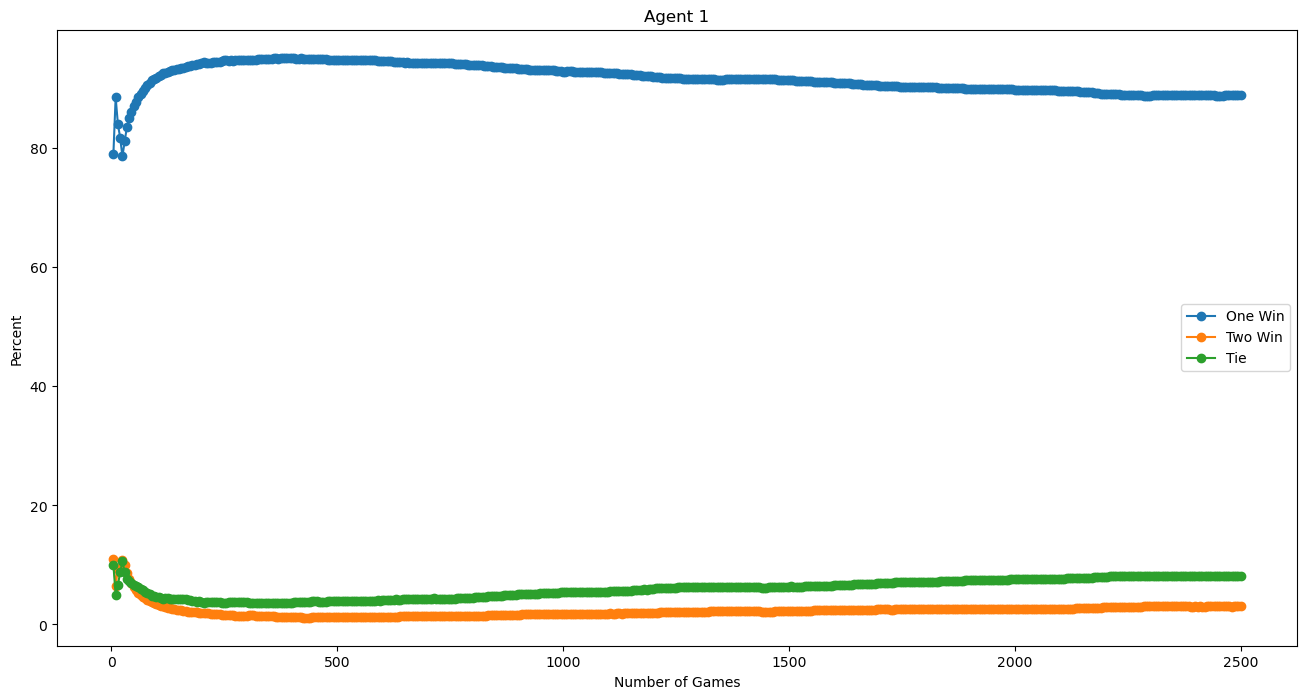

In [28]:
y1,y2,y0,y3,x,t=S1.arrays()
figure(figsize=(16,8))
plot(t,y1,'-o',label='One Win')
plot(t,y2,'-o',label='Two Win')
plot(t,y0,'-o',label='Tie')
if any(y3):
    plot(t,y3,'-o',label='Illegal')
legend()
title('Agent 1')
xlabel('Number of Games')
ylabel('Percent')

Text(0, 0.5, 'Percent')

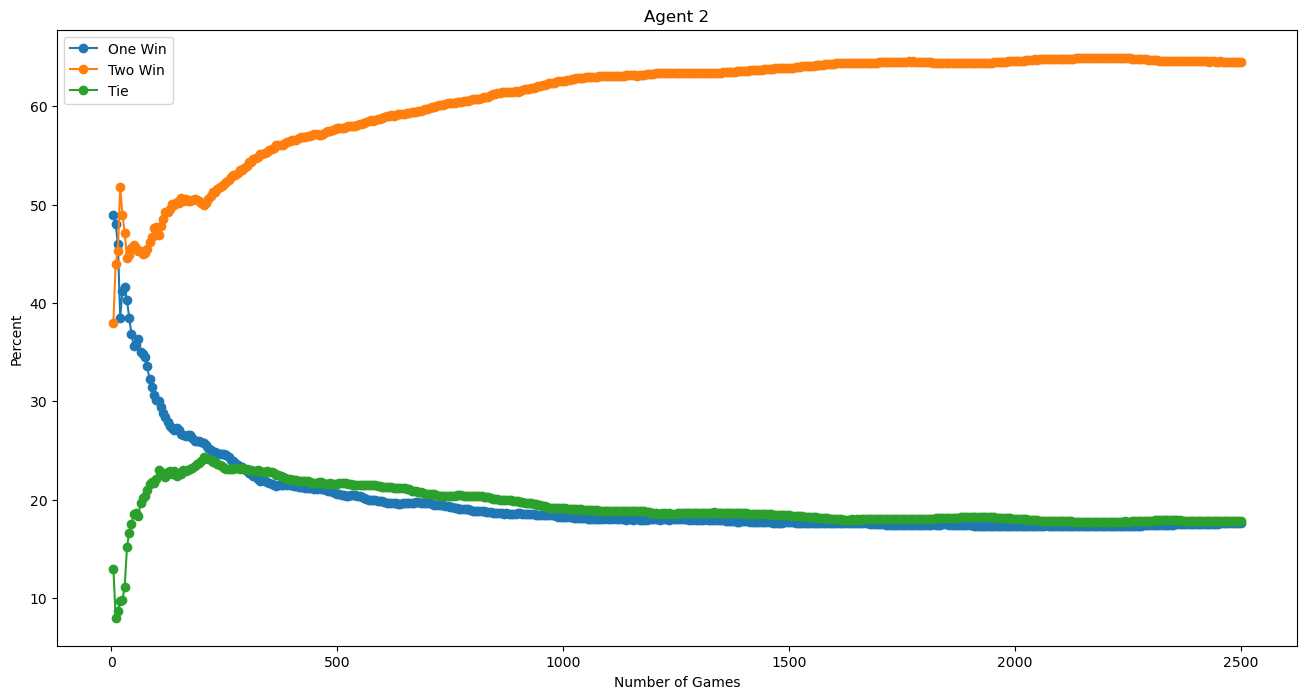

In [29]:
y1,y2,y0,y3,x,t=S2.arrays()
figure(figsize=(16,8))
plot(t,y1,'-o',label='One Win')
plot(t,y2,'-o',label='Two Win')
plot(t,y0,'-o',label='Tie')
if any(y3):
    plot(t,y3,'-o',label='Illegal')
legend()
title('Agent 2')
xlabel('Number of Games')
ylabel('Percent')

In [30]:
agent1.learning=False
agent2.learning=False
g=Game(number_of_games=100)
g.display=False
result=g.run(agent1,random_agent)
g.report()


Total number of games:  100
Winning 84.00 percent
Losing 2.00 percent
Tie 14.00 percent


In [31]:
agent1.learning=False
agent2.learning=False
g=Game(number_of_games=100)
g.display=False
result=g.run(random_agent,agent2)
g.report()


Total number of games:  100
Winning 13.00 percent
Losing 75.00 percent
Tie 12.00 percent
